In [1]:
import rastereasy

Standardization of spectral bands (useful for machine learning)
===============================================================

Two options

- Return an image with standardized bands (function `standardize`)
- Make standardization in the image directly (function `standardize` with `inplace=True`)

In [2]:
name_im='./data/demo/sentinel.tif'
image=rastereasy.Geoimage(name_im)
image.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




In [3]:
help(image.standardize)

Help on method standardize in module rastereasy.rastereasy:

standardize(
    scaler=None,
    dest_name=None,
    type='standard',
    inplace=False,
    dtype='float64'
) method of rastereasy.rastereasy.Geoimage instance
    Standardize band values.

    This method performs statistical standardization of image bands, modifying
    the current image so values have specific statistical properties, such as
    zero mean and unit variance (for 'standard' type) or values in the 0-1 range
    (for 'minmax' type).

    Parameters
    ----------
    scaler : object or None, optional
        Scikit-learn scaler object to use. If None, a new scaler is created.
        Default is None.
    dest_name : str, optional
        Path to save the standardized image. If None, image is not saved.
        Default is None.
    type : {'standard', 'minmax'}, optional
        Type of standardization to apply:
        - 'standard': Standardize to zero mean and unit variance (z-scores)
        - 'minmax': Sc

## 1) Return an image with standardized bands 

### Compute a standardized image and the associated scaler with mean=0 and std=1

In [4]:
image_std,scaler_std=image.standardize()

Verifying the standardization and visualization of a band

mean original image
[ 596.931767  718.706135 1000.098372 1164.791581 1392.141873 1606.713958
 1733.981529 1748.315853 1855.852581 1836.036193 2199.967594 1991.173092]
std original image
[ 289.97194443  384.29107313  426.94546773  669.4242913   784.08244616
  994.38826097 1082.95395459 1113.75172779 1186.91718943 1173.93864786
 1480.76997959 1385.38665439]
mean standardize image
[-1.10816245e-16 -5.80371307e-17 -7.51185780e-17  1.25112365e-16
 -6.60236310e-17 -6.01403372e-17  3.73461262e-17 -5.67297320e-17
 -4.63273864e-17  9.20294951e-17 -1.21076482e-16  4.62136995e-17]
std standardize image
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<Figure size 640x480 with 0 Axes>

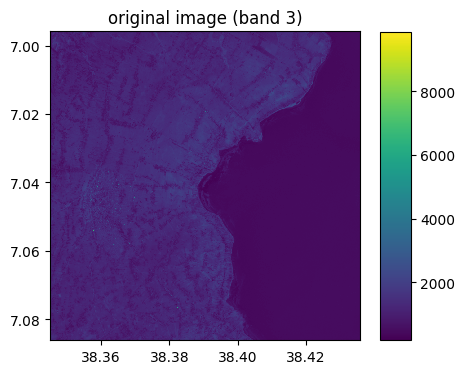

<Figure size 640x480 with 0 Axes>

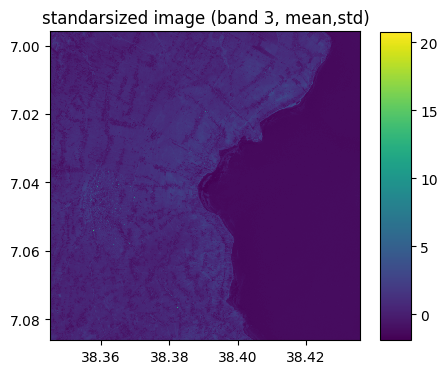

In [5]:
print('mean original image')
print(image.mean(axis='pixel'))
print('std original image')
print(image.std(axis='pixel'))
print('mean standardize image')
print(image_std.mean(axis='pixel'))
print('std standardize image')
print(image_std.std(axis='pixel'))

image.visu(3,colorbar=True,title='original image (band 3)',percentile=0)
image_std.visu(3,colorbar=True,title='standarsized image (band 3, mean,std)',percentile=0)


### Compute a standardized image and the associated scaler with min/max

In [6]:
image_minmax,scaler_minmax=image.standardize(type='minmax')

Verifying the standardization and visualization of a band

min original image
[132  92 200 184 259 141 142 124 144 135 131  80]
max original image
[ 1576 12416  9864  7296  4344  4928  5147  8104  5292  4903  6014  6525]
mean standardize image
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
std standardize image
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<Figure size 640x480 with 0 Axes>

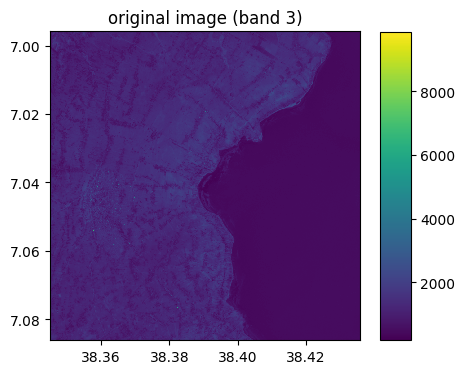

<Figure size 640x480 with 0 Axes>

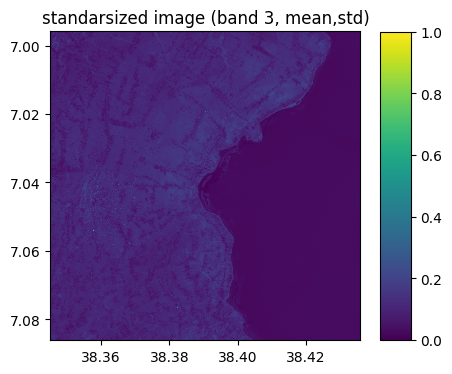

In [7]:
print('min original image')
print(image.min(axis='pixel'))
print('max original image')
print(image.max(axis='pixel'))
print('mean standardize image')
print(image_minmax.min(axis='pixel'))
print('std standardize image')
print(image_minmax.max(axis='pixel'))

image.visu(3,colorbar=True,title='original image (band 3)',percentile=0)
image_minmax.visu(3,colorbar=True,title='standarsized image (band 3, mean,std)',percentile=0)


### 2) Apply a pre-computed scaler to an image

With `standardize`, it is possible to apply a pre computed scaler to an image. For example, we can apply `scaler_std`and `scaler_minmax` to the image (or to any other image)

In [8]:
application_scaler_std=image.standardize(scaler_std)
application_scaler_minmax=image.standardize(scaler_minmax)

Verify the consistency (`application_scaler_std` identical to `image_std` and `application_scaler_minmax` identical to `image_minmax`)

In [9]:
print('Consistency between standardization mean/std : ' , (application_scaler_std-image_std).abs().sum())
print('Consistency between standardization min/max: ' , (application_scaler_minmax-image_minmax).abs().sum())

Consistency between standardization mean/std :  0.0
Consistency between standardization min/max:  0.0


### 3) Apply an inverse of a standardization

From a scaler, it is possible to get back to the original image domain with `inverse_standardize`


In [10]:
help(image.inverse_standardize)

Help on method inverse_standardize in module rastereasy.rastereasy:

inverse_standardize(scaler, dest_name=None, inplace=False, dtype='float64') method of rastereasy.rastereasy.Geoimage instance
    Revert standardization.

    This method creates an image by applying the inverse of a standardization
    transformation, converting standardized values back to their original scale.

    Parameters
    ----------
    scaler : object
        Scikit-learn scaler object that was used for the original standardization.
        This must have an inverse_transform() method (like StandardScaler or MinMaxScaler).
    dest_name : str, optional
        Path to save the restored image. If None, image is not saved.
        Default is None.
    inplace : bool, default False
        If False, return a copy of the inverse standardization.
        Otherwise, do operation in place and return None.
    dtype : str, optional
        Data type for the output image. Default is 'float64'.

    Returns
    -----

In [11]:
recovered_image_std = image_std.inverse_standardize(scaler_std)
recovered_image_minmax = image_minmax.inverse_standardize(scaler_minmax)

Check the consistency of inverse standardized images

mean original image
 [ 596.931767  718.706135 1000.098372 1164.791581 1392.141873 1606.713958
 1733.981529 1748.315853 1855.852581 1836.036193 2199.967594 1991.173092]
mean reconstructed image (std)
 [ 596.931767  718.706135 1000.098372 1164.791581 1392.141873 1606.713958
 1733.981529 1748.315853 1855.852581 1836.036193 2199.967594 1991.173092]
mean reconstructed image (min/max)
 [ 596.931767  718.706135 1000.098372 1164.791581 1392.141873 1606.713958
 1733.981529 1748.315853 1855.852581 1836.036193 2199.967594 1991.173092]
----
std original image
 [ 289.97194443  384.29107313  426.94546773  669.4242913   784.08244616
  994.38826097 1082.95395459 1113.75172779 1186.91718943 1173.93864786
 1480.76997959 1385.38665439]
std reconstructed image (std)
 [ 289.97194443  384.29107313  426.94546773  669.4242913   784.08244616
  994.38826097 1082.95395459 1113.75172779 1186.91718943 1173.93864786
 1480.76997959 1385.38665439]
std reconstructed image (min/max)
 [ 289.97194443  384.29107313  426.9

<Figure size 640x480 with 0 Axes>

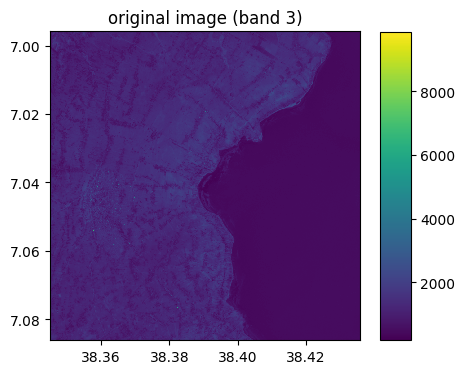

<Figure size 640x480 with 0 Axes>

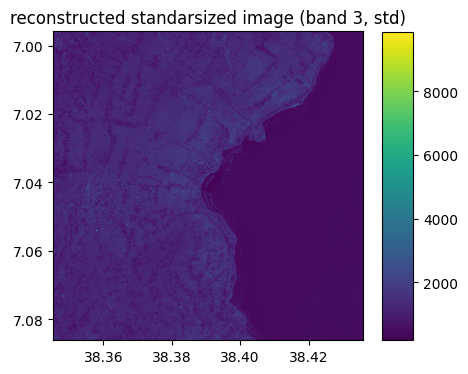

<Figure size 640x480 with 0 Axes>

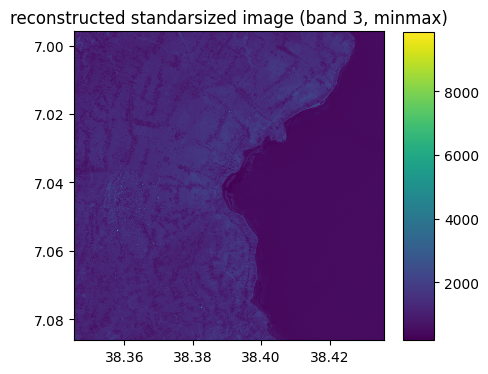

In [12]:
print('mean original image\n',image.mean(axis='pixel'))
print('mean reconstructed image (std)\n',recovered_image_std.mean(axis='pixel'))
print('mean reconstructed image (min/max)\n',recovered_image_minmax.mean(axis='pixel'))
print('----')
print('std original image\n',image.std(axis='pixel'))
print('std reconstructed image (std)\n',recovered_image_std.std(axis='pixel'))
print('std reconstructed image (min/max)\n',recovered_image_minmax.std(axis='pixel'))
print('----')
print('min original image\n',image.min(axis='pixel'))
print('min reconstructed image (std)\n',recovered_image_std.min(axis='pixel'))
print('min reconstructed image (min/max)\n',recovered_image_minmax.min(axis='pixel'))
print('----')
print('max original image\n',image.max(axis='pixel'))
print('max reconstructed image (std)\n',recovered_image_std.max(axis='pixel'))
print('max reconstructed image (min/max)\n',recovered_image_minmax.max(axis='pixel'))
image.visu(3,colorbar=True,title='original image (band 3)',percentile=0)
recovered_image_std.visu(3,colorbar=True,title='reconstructed standarsized image (band 3, std)',percentile=0)
recovered_image_minmax.visu(3,colorbar=True,title='reconstructed standarsized image (band 3, minmax)',percentile=0)


## 2) Make standardization in the image directly (function `standardize` with `inplace=True`)

### Compute a standardized image and the associated scaler with mean=0 and std=1

In [13]:
print('Before standardization')
print('mean original image')
print(image.mean(axis='pixel'))
print('std original image')
print(image.std(axis='pixel'))

image.standardize(inplace=True)


print('After standardization')
print('mean original image')
print(image.mean(axis='pixel'))
print('std original image')
print(image.std(axis='pixel'))



Before standardization
mean original image
[ 596.931767  718.706135 1000.098372 1164.791581 1392.141873 1606.713958
 1733.981529 1748.315853 1855.852581 1836.036193 2199.967594 1991.173092]
std original image
[ 289.97194443  384.29107313  426.94546773  669.4242913   784.08244616
  994.38826097 1082.95395459 1113.75172779 1186.91718943 1173.93864786
 1480.76997959 1385.38665439]
After standardization
mean original image
[-1.10816245e-16 -5.80371307e-17 -7.51185780e-17  1.25112365e-16
 -6.60236310e-17 -6.01403372e-17  3.73461262e-17 -5.67297320e-17
 -4.63273864e-17  9.20294951e-17 -1.21076482e-16  4.62136995e-17]
std original image
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Compute a standardized image and the associated scaler with  min/max

Note : we need to reopen the image since it has been modified

In [14]:
name_im='./data/demo/sentinel.tif'
image=rastereasy.Geoimage(name_im)


print('Before standardization')
print('min original image')
print(image.min(axis='pixel'))
print('max original image')
print(image.max(axis='pixel'))

image.standardize(type='minmax',inplace=True)


print('After standardization')
print('min original image')
print(image.min(axis='pixel'))
print('max original image')
print(image.max(axis='pixel'))


Before standardization
min original image
[132  92 200 184 259 141 142 124 144 135 131  80]
max original image
[ 1576 12416  9864  7296  4344  4928  5147  8104  5292  4903  6014  6525]
After standardization
min original image
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
max original image
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
image.inverse_standardize(scaler_minmax,inplace=True)
# minmax since it is the image variable has been normalized by minmax

Check the consistency of inverse standardized images

In [16]:
print('mean original image\n',image.mean(axis='pixel'))
print('std original image\n',image.std(axis='pixel'))
print('min original image\n',image.min(axis='pixel'))
print('max original image\n',image.max(axis='pixel'))


mean original image
 [ 596.931767  718.706135 1000.098372 1164.791581 1392.141873 1606.713958
 1733.981529 1748.315853 1855.852581 1836.036193 2199.967594 1991.173092]
std original image
 [ 289.97194443  384.29107313  426.94546773  669.4242913   784.08244616
  994.38826097 1082.95395459 1113.75172779 1186.91718943 1173.93864786
 1480.76997959 1385.38665439]
min original image
 [132.  92. 200. 184. 259. 141. 142. 124. 144. 135. 131.  80.]
max original image
 [ 1576. 12416.  9864.  7296.  4344.  4928.  5147.  8104.  5292.  4903.
  6014.  6525.]
